In [1]:
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import shap


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv("Analytics Assessment (1).xlsx - Part 2 - Data.csv")
df

,uniqueid,Bads,PAYMENT_LATEST_PAYMENT_METHOD,PAYMENT_AUTODEBIT,LOAN_AMOUNT,PAYMENT_MISSED_PAYMENTS_BUCKET,EMI_BUCKET,BANKS_MOBILEAPPUSAGE_DUR_BUCKET,PROFILE_CONTRACT_TENURE_BANK,CASA_TRANSACTION_AMOUNT_PERMONTH_BUCKET,CASA_TRNX_BUCKET,CASA_TRANS_DEBIT_BUCKET,CASA_TRANS_CREDIT_BUCKET,NUMBER_OF_CREDIT_PRODUCTS_WITH_BANK,NUMBER_OF_LIABILITIES_PRODUCTS_WITH_BANK,Age,enq012_bank1,enq012_bank2,enq012allbanks,enq006same bank
0,1,0,1.0,0,4,1,3.0,4,NaN,NaN,NaN,4,4,5,1.0,61,0,0,0,0
1,2,0,2.0,0,3,1,2.0,3,NaN,5.0,3.0,3,3,2,2.0,27,0,0,3,0
2,3,0,1.0,0,4,1,3.0,4,NaN,NaN,NaN,4,4,5,2.0,41,0,0,0,0
3,4,0,1.0,0,1,1,1.0,1,NaN,NaN,NaN,1,1,1,3.0,47,0,0,0,0
4,5,0,2.0,0,3,1,4.0,3,NaN,NaN,NaN,3,2,3,1.0,27,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23389,23390,0,1.0,0,4,1,2.0,4,NaN,NaN,NaN,4,4,4,2.0,66,0,0,1,0
23390,23391,0,1.0,0,3,1,2.0,1,NaN,1.0,2.0,1,1,1,1.0,45,0,0,0,1
23391,23392,0,2.0,0,4,1,5.0,3,NaN,1.0,1.0,2,4,4,3.0,31,0,0,1,1
23392,23393,0,2.0,0,4,1,5.0,4,24.0,NaN,NaN,5,3,4,1.0,38,0,0,1,0


## Data Pre-Processing

In [3]:
df.shape

(23394, 20)

In [4]:
# DataTypes Check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23394 entries, 0 to 23393
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   uniqueid                                  23394 non-null  int64  
 1   Bads                                      23394 non-null  int64  
 2   PAYMENT_LATEST_PAYMENT_METHOD             23288 non-null  float64
 3   PAYMENT_AUTODEBIT                         23394 non-null  int64  
 4   LOAN_AMOUNT                               23394 non-null  int64  
 5   PAYMENT_MISSED_PAYMENTS_BUCKET            23394 non-null  int64  
 6   EMI_BUCKET                                23168 non-null  float64
 7   BANKS_MOBILEAPPUSAGE_DUR_BUCKET           23394 non-null  int64  
 8   PROFILE_CONTRACT_TENURE_BANK              5643 non-null   float64
 9   CASA_TRANSACTION_AMOUNT_PERMONTH_BUCKET   9706 non-null   float64
 10  CASA_TRNX_BUCKET                  

In [5]:
#Count the empty (NaN, NAN, na) values in each column

df.isna().sum()

uniqueid                                        0
Bads                                            0
PAYMENT_LATEST_PAYMENT_METHOD                 106
PAYMENT_AUTODEBIT                               0
LOAN_AMOUNT                                     0
PAYMENT_MISSED_PAYMENTS_BUCKET                  0
EMI_BUCKET                                    226
BANKS_MOBILEAPPUSAGE_DUR_BUCKET                 0
PROFILE_CONTRACT_TENURE_BANK                17751
CASA_TRANSACTION_AMOUNT_PERMONTH_BUCKET     13688
CASA_TRNX_BUCKET                            13688
CASA_TRANS_DEBIT_BUCKET                         0
CASA_TRANS_CREDIT_BUCKET                        0
NUMBER_OF_CREDIT_PRODUCTS_WITH_BANK             0
NUMBER_OF_LIABILITIES_PRODUCTS_WITH_BANK      106
Age                                             0
enq012_bank1                                    0
enq012_bank2                                    0
enq012allbanks                                  0
enq006same bank                                 0


## Exploratory Data Analysis

In [6]:
# Viewing Basic Statistics

df.describe()

,uniqueid,Bads,PAYMENT_LATEST_PAYMENT_METHOD,PAYMENT_AUTODEBIT,LOAN_AMOUNT,PAYMENT_MISSED_PAYMENTS_BUCKET,EMI_BUCKET,BANKS_MOBILEAPPUSAGE_DUR_BUCKET,PROFILE_CONTRACT_TENURE_BANK,CASA_TRANSACTION_AMOUNT_PERMONTH_BUCKET,CASA_TRNX_BUCKET,CASA_TRANS_DEBIT_BUCKET,CASA_TRANS_CREDIT_BUCKET,NUMBER_OF_CREDIT_PRODUCTS_WITH_BANK,NUMBER_OF_LIABILITIES_PRODUCTS_WITH_BANK,Age,enq012_bank1,enq012_bank2,enq012allbanks,enq006same bank
count,23394.000000,23394.000000,23288.000000,23394.000000,23394.000000,23394.000000,23168.000000,23394.000000,5643.000000,9706.000000,9706.000000,23394.000000,23394.000000,23394.000000,23288.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000
mean,11697.500000,0.060571,2.378135,0.198940,3.175173,1.099684,2.842541,3.232837,21.346093,2.385638,1.941995,3.427973,2.833419,3.189920,2.094212,40.319142,0.132940,0.133581,1.305591,0.401898
std,6753.410435,0.238547,1.212263,0.399211,1.293869,0.390190,1.271453,1.397837,4.980769,1.438255,1.220567,1.296756,1.355248,1.443017,0.855149,11.748914,0.562229,0.518027,2.399097,0.972352
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5849.250000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,2.000000,24.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,31.000000,0.000000,0.000000,0.000000,0.000000
50%,11697.500000,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,3.000000,24.000000,2.000000,1.000000,4.000000,3.000000,3.000000,2.000000,38.000000,0.000000,0.000000,0.000000,0.000000
75%,17545.750000,0.000000,4.000000,0.000000,4.000000,1.000000,4.000000,4.000000,24.000000,4.000000,3.000000,5.000000,4.000000,4.000000,2.000000,48.000000,0.000000,0.000000,2.000000,0.000000
max,23394.000000,1.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,24.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,92.000000,12.000000,10.000000,41.000000,14.000000


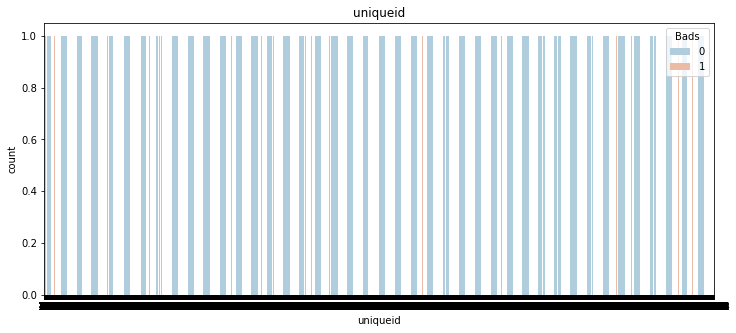

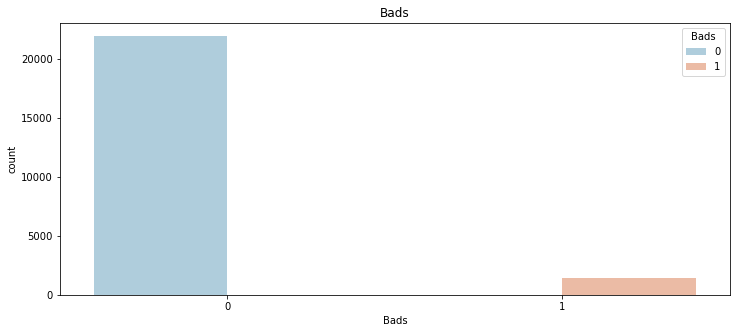

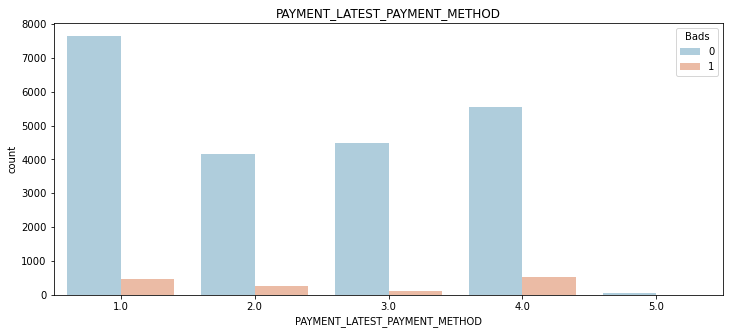

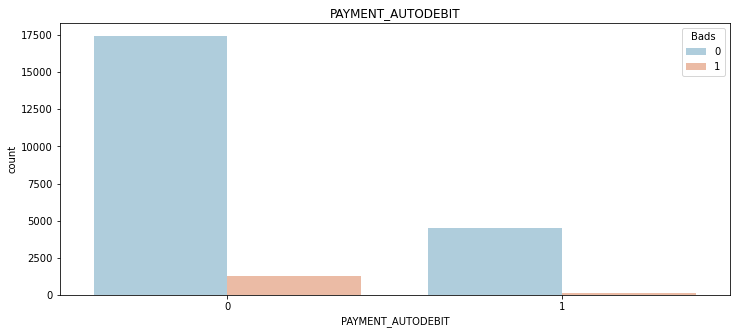

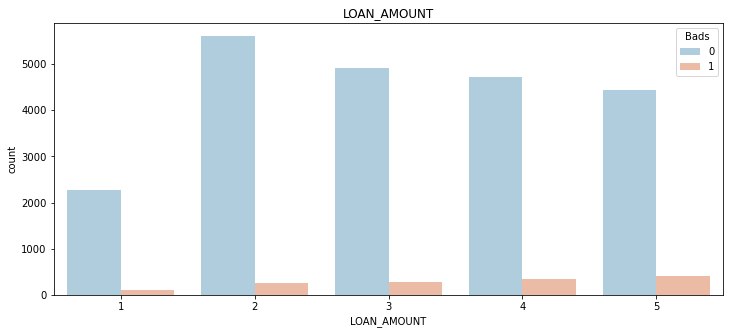

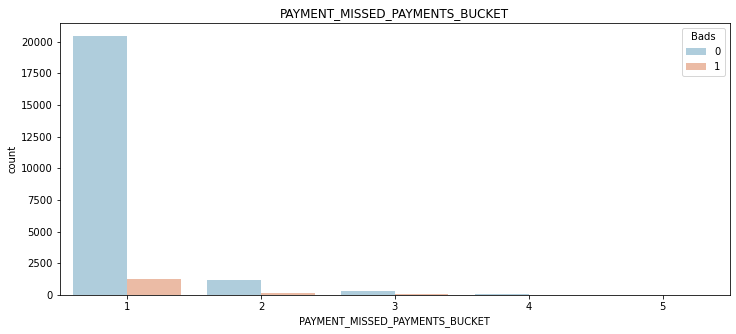

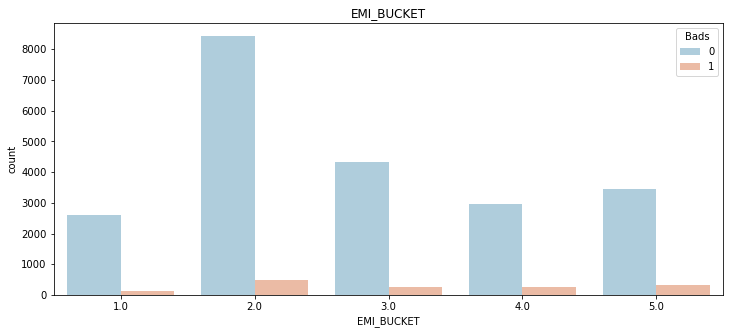

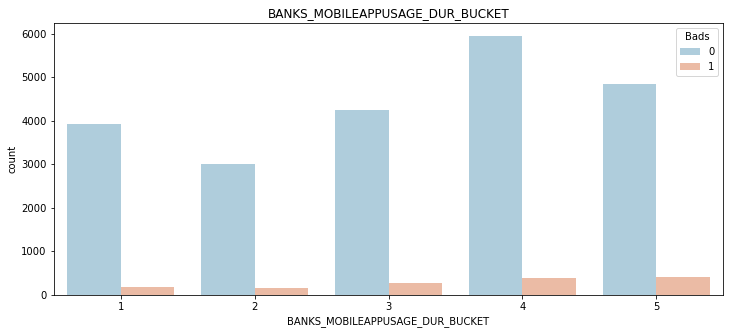

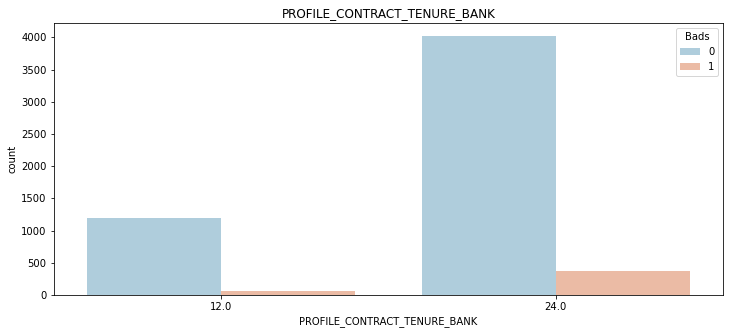

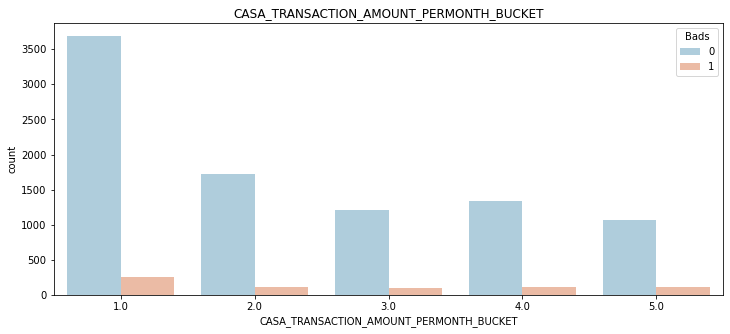

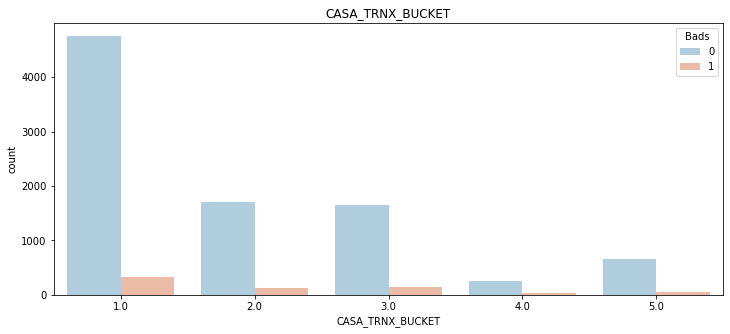

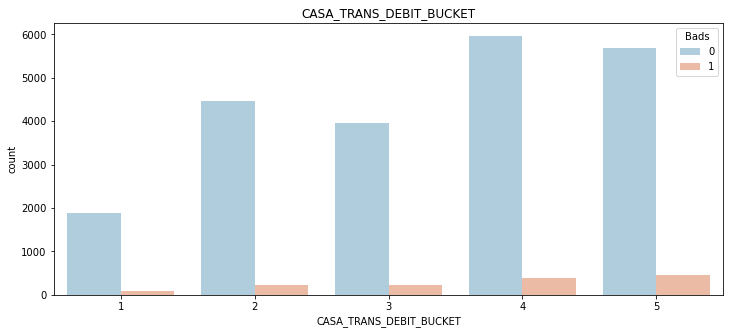

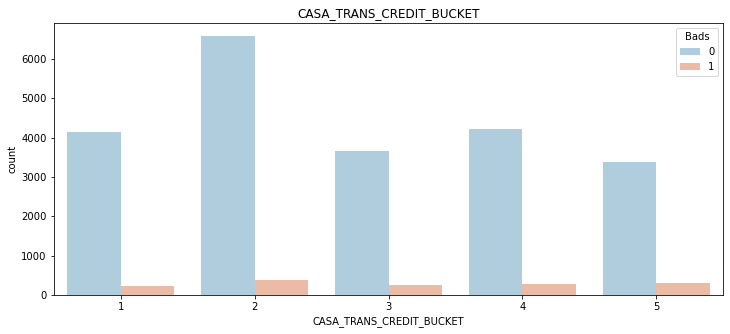

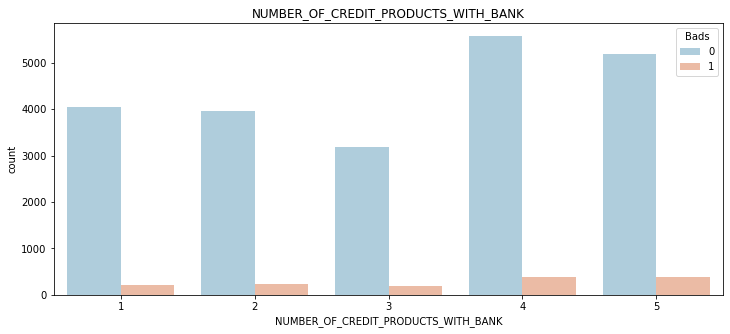

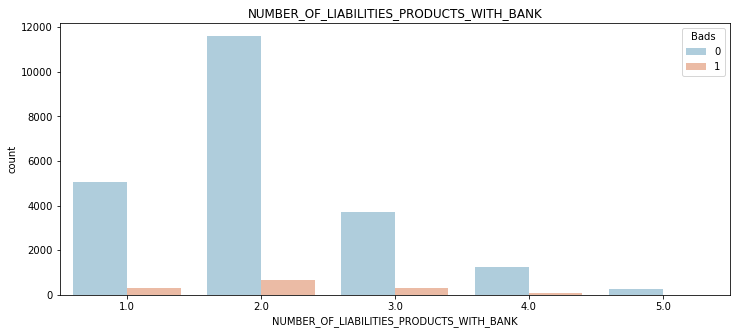

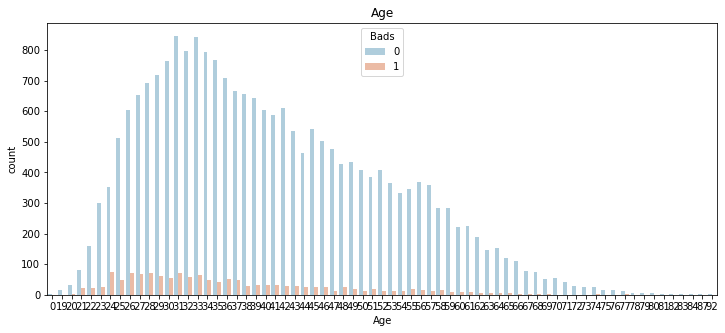

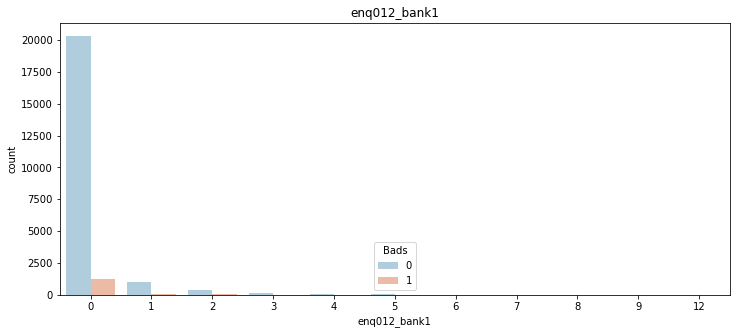

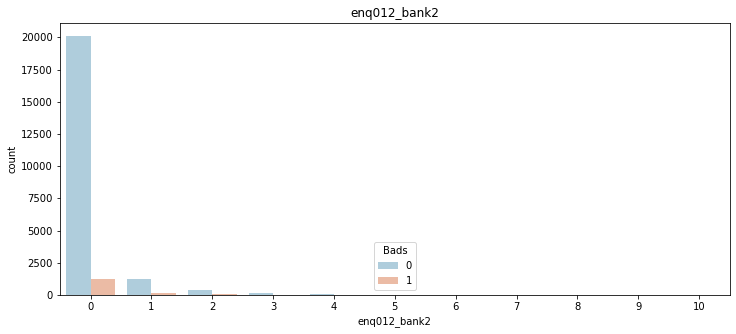

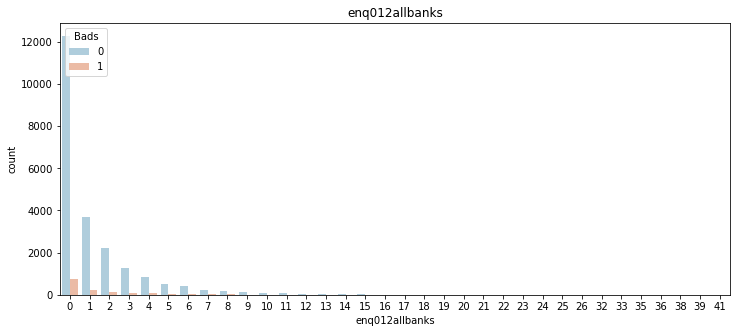

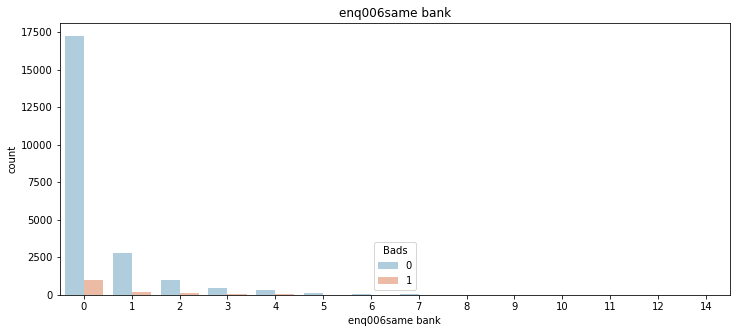

In [7]:
# Reviewing Similarities

numeric_features=[x for x in df.columns if df[x].dtype!="object"]

for i in df[numeric_features].columns:
    plt.figure(figsize=(12,5))
    plt.title(i)
    sns.countplot(x=df[i], hue="Bads", data=df, palette="RdBu_r")
    

<AxesSubplot:>

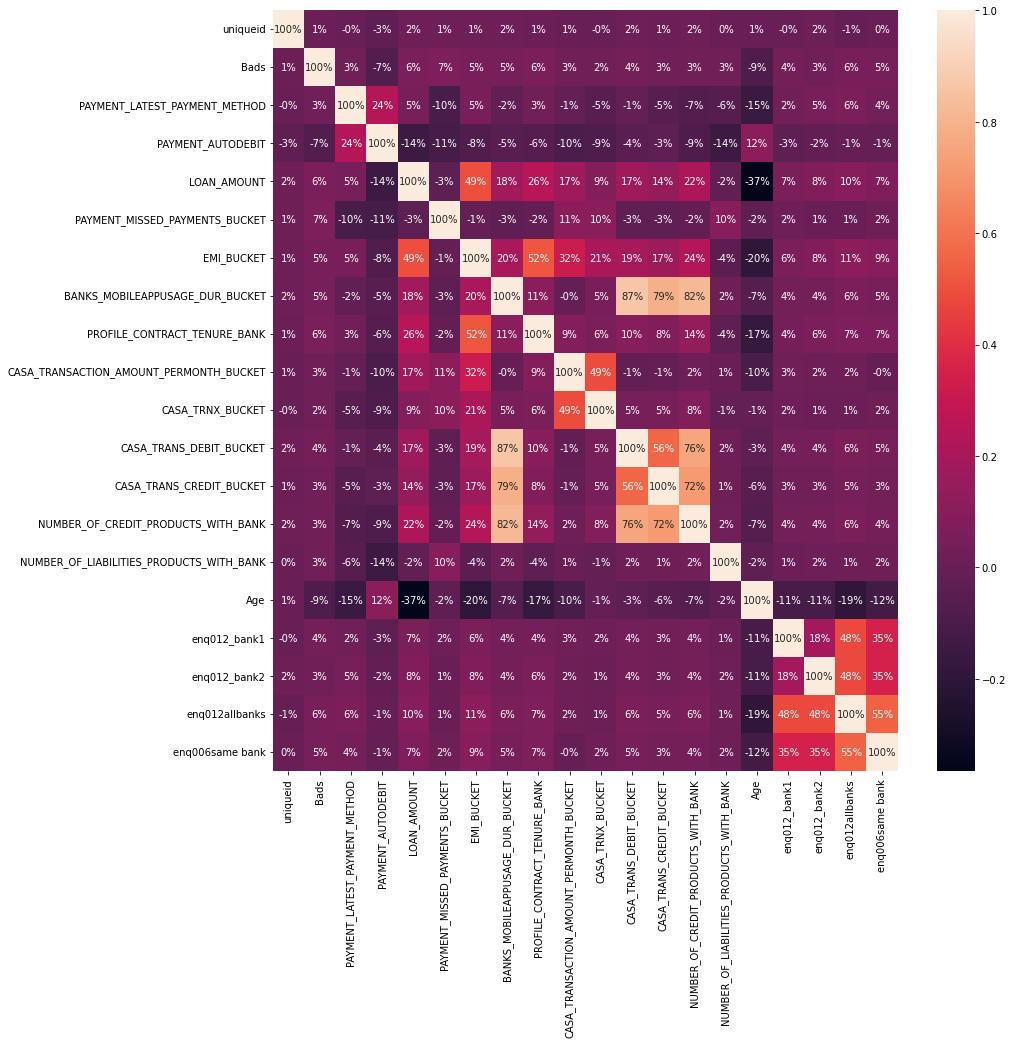

In [8]:
#Visualize the correlation

plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

## Date Modeling

### Train Test Split

In [9]:
X = df.drop(columns=["Bads",
                     "uniqueid"],axis=1)
Y = df["Bads"]

X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
Y = Y.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

# define categorical and numeric transformers
numeric_transformer = Pipeline(steps=[
    ('knnImputer', KNNImputer(n_neighbors=2, weights="uniform")),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

from sklearn.compose import make_column_selector as selector

#  dispatch object columns to the categorical_transformer and remaining columns to numerical_transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="object")),
    ('cat', categorical_transformer, selector(dtype_include="object"))
])

# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])


test_size = 0.30
seed = 42

In [10]:
# Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                random_state=seed,
                                                test_size=test_size)

print("X_train : " + str(X_train.shape))
print("X_test  : " + str(X_test.shape))
print("Y_train : " + str(Y_train.shape))
print("Y_test  : " + str(Y_test.shape))

X_train : (16375, 18)
X_test  : (7019, 18)
Y_train : (16375,)
Y_test  : (7019,)


### Logistic Regression

In [11]:
LR = LogisticRegression(max_iter=5000, random_state=42)
LR.fit(X_train, Y_train)
predictions= LR.predict(X_test)

print("------------------------------------------------------------")
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LR.score(X_test, Y_test)))
print("------------------------------------------------------------")
print(classification_report(Y_test, predictions, zero_division=0,target_names=['Good (0)','Bad (1)']))
print("------------------------------------------------------------")

------------------------------------------------------------
Accuracy of logistic regression classifier on test set: 0.94
------------------------------------------------------------
              precision    recall  f1-score   support

    Good (0)       0.94      1.00      0.97      6587
     Bad (1)       0.00      0.00      0.00       432

    accuracy                           0.94      7019
   macro avg       0.47      0.50      0.48      7019
weighted avg       0.88      0.94      0.91      7019

------------------------------------------------------------


#### Adding Parameters

In [12]:
lr_params = {
    "penalty": ['l2', 'none'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [13]:
lr_clf = GridSearchCV(
    estimator=LR, 
    param_grid=lr_params, 
    return_train_score=True, 
    scoring="average_precision",
    cv=5, 
    verbose=3
)

In [14]:
lr_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END C=0.001, penalty=l2;, score=(train=0.116, test=0.090) total time=   0.1s
[CV 2/5] END C=0.001, penalty=l2;, score=(train=0.117, test=0.087) total time=   0.1s
[CV 3/5] END C=0.001, penalty=l2;, score=(train=0.105, test=0.144) total time=   0.1s
[CV 4/5] END C=0.001, penalty=l2;, score=(train=0.108, test=0.127) total time=   0.1s
[CV 5/5] END C=0.001, penalty=l2;, score=(train=0.112, test=0.114) total time=   0.1s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 1/5] END C=0.001, penalty=none;, score=(train=0.135, test=0.106) total time=   0.1s
[CV 2/5] END C=0.001, penalty=none;, score=(train=0.133, test=0.107) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 3/5] END C=0.001, penalty=none;, score=(train=0.123, test=0.153) total time=   0.2s
[CV 4/5] END C=0.001, penalty=none;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=0.001, penalty=none;, score=(train=0.130, test=0.123) total time=   0.1s


Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 1/5] END C=0.01, penalty=l2;, score=(train=0.133, test=0.102) total time=   0.1s
[CV 2/5] END C=0.01, penalty=l2;, score=(train=0.132, test=0.101) total time=   0.1s
[CV 3/5] END C=0.01, penalty=l2;, score=(train=0.120, test=0.156) total time=   0.1s
[CV 4/5] END C=0.01, penalty=l2;, score=(train=0.124, test=0.140) total time=   0.1s
[CV 5/5] END C=0.01, penalty=l2;, score=(train=0.128, test=0.125) total time=   0.2s
[CV 1/5] END C=0.01, penalty=none;, score=(train=0.135, test=0.106) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 2/5] END C=0.01, penalty=none;, score=(train=0.133, test=0.107) total time=   0.2s
[CV 3/5] END C=0.01, penalty=none;, score=(train=0.123, test=0.153) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 4/5] END C=0.01, penalty=none;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=0.01, penalty=none;, score=(train=0.130, test=0.123) total time=   0.1s


Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 1/5] END C=0.1, penalty=l2;, score=(train=0.135, test=0.106) total time=   0.2s
[CV 2/5] END C=0.1, penalty=l2;, score=(train=0.133, test=0.106) total time=   0.2s
[CV 3/5] END C=0.1, penalty=l2;, score=(train=0.123, test=0.153) total time=   0.2s
[CV 4/5] END C=0.1, penalty=l2;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=0.1, penalty=l2;, score=(train=0.130, test=0.123) total time=   0.2s
[CV 1/5] END C=0.1, penalty=none;, score=(train=0.135, test=0.106) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 2/5] END C=0.1, penalty=none;, score=(train=0.133, test=0.107) total time=   0.2s
[CV 3/5] END C=0.1, penalty=none;, score=(train=0.123, test=0.153) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 4/5] END C=0.1, penalty=none;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=0.1, penalty=none;, score=(train=0.130, test=0.123) total time=   0.1s


Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 1/5] END C=1, penalty=l2;, score=(train=0.135, test=0.106) total time=   0.2s
[CV 2/5] END C=1, penalty=l2;, score=(train=0.133, test=0.107) total time=   0.2s
[CV 3/5] END C=1, penalty=l2;, score=(train=0.123, test=0.153) total time=   0.2s
[CV 4/5] END C=1, penalty=l2;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=1, penalty=l2;, score=(train=0.130, test=0.123) total time=   0.2s
[CV 1/5] END C=1, penalty=none;, score=(train=0.135, test=0.106) total time=   0.2s
[CV 2/5] END C=1, penalty=none;, score=(train=0.133, test=0.107) total time=   0.2s
[CV 3/5] END C=1, penalty=none;, score=(train=0.123, test=0.153) total time=   0.2s
[CV 4/5] END C=1, penalty=none;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=1, penalty=none;, score=(train=0.130, test=0.123) total time=   0.1s
[CV 1/5] END C=10, penalty=l2;, score=(train=0.135, test=0.106) total time=   0.2s
[CV 2/5] END C=10, penalty=l2;, score=(train=0.133, test=0.107) total time=   0.2s
[CV 

Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 2/5] END C=10, penalty=none;, score=(train=0.133, test=0.107) total time=   0.2s
[CV 3/5] END C=10, penalty=none;, score=(train=0.123, test=0.153) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 4/5] END C=10, penalty=none;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=10, penalty=none;, score=(train=0.130, test=0.123) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 1/5] END C=100, penalty=l2;, score=(train=0.135, test=0.106) total time=   0.1s
[CV 2/5] END C=100, penalty=l2;, score=(train=0.133, test=0.107) total time=   0.2s
[CV 3/5] END C=100, penalty=l2;, score=(train=0.123, test=0.153) total time=   0.2s
[CV 4/5] END C=100, penalty=l2;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=100, penalty=l2;, score=(train=0.130, test=0.123) total time=   0.2s
[CV 1/5] END C=100, penalty=none;, score=(train=0.135, test=0.106) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 2/5] END C=100, penalty=none;, score=(train=0.133, test=0.107) total time=   0.1s
[CV 3/5] END C=100, penalty=none;, score=(train=0.123, test=0.153) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 4/5] END C=100, penalty=none;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=100, penalty=none;, score=(train=0.130, test=0.123) total time=   0.1s


Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 1/5] END C=1000, penalty=l2;, score=(train=0.135, test=0.106) total time=   0.2s
[CV 2/5] END C=1000, penalty=l2;, score=(train=0.133, test=0.107) total time=   0.2s
[CV 3/5] END C=1000, penalty=l2;, score=(train=0.123, test=0.153) total time=   0.2s
[CV 4/5] END C=1000, penalty=l2;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=1000, penalty=l2;, score=(train=0.130, test=0.123) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 1/5] END C=1000, penalty=none;, score=(train=0.135, test=0.106) total time=   0.2s
[CV 2/5] END C=1000, penalty=none;, score=(train=0.133, test=0.107) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


[CV 3/5] END C=1000, penalty=none;, score=(train=0.123, test=0.153) total time=   0.2s
[CV 4/5] END C=1000, penalty=none;, score=(train=0.126, test=0.143) total time=   0.2s
[CV 5/5] END C=1000, penalty=none;, score=(train=0.130, test=0.123) total time=   0.2s


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'none']},
             return_train_score=True, scoring='average_precision', verbose=3)

In [15]:
# Getting Best Estimator and Predicions

best_lr = lr_clf.best_estimator_
best_lr_fit = best_lr.fit(X_train, Y_train)
best_lr_predictions = best_lr_fit.predict(X_test)

Setting penalty='none' will ignore the C and l1_ratio parameters


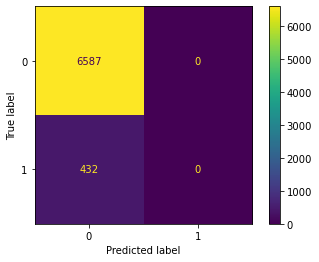

In [16]:
# Confusion Matrix

cm = confusion_matrix(Y_test, best_lr_predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [17]:
#print best model accuracy and parameters

print("------------------------------------------------------------")
print("Best accuracy score (logistic regression): ", lr_clf.best_score_)
print("------------------------------------------------------------")
print("Best parameters:")
print(lr_clf.best_params_)
print("------------------------------------------------------------")

------------------------------------------------------------
Best accuracy score (logistic regression):  0.1264599279604519
------------------------------------------------------------
Best parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------


In [18]:
# Confusion Matrix

print(classification_report(Y_test, best_lr_predictions, target_names=['Good', 'Bad']))

              precision    recall  f1-score   support

        Good       0.94      1.00      0.97      6587
         Bad       0.00      0.00      0.00       432

    accuracy                           0.94      7019
   macro avg       0.47      0.50      0.48      7019
weighted avg       0.88      0.94      0.91      7019



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


#### Cross Validation

In [19]:
# Cross Validation

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

10-fold cross validation average accuracy: 0.940


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


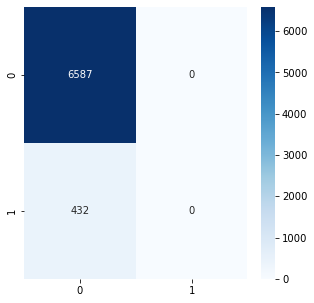

In [20]:
cm = confusion_matrix(Y_test, predictions)

cm_matrix = pd.DataFrame(data=cm)


fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues');

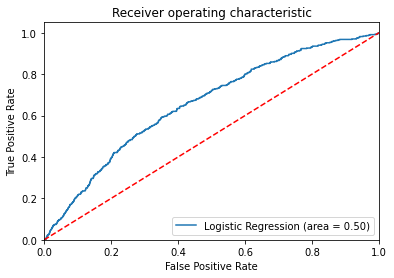

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Features Importance

In [22]:
# Getting the Columns for Features Importance

df.columns
features = ['PAYMENT_LATEST_PAYMENT_METHOD',
       'PAYMENT_AUTODEBIT', 'LOAN_AMOUNT', 'PAYMENT_MISSED_PAYMENTS_BUCKET',
       'EMI_BUCKET', 'BANKS_MOBILEAPPUSAGE_DUR_BUCKET',
       'PROFILE_CONTRACT_TENURE_BANK',
       'CASA_TRANSACTION_AMOUNT_PERMONTH_BUCKET', 'CASA_TRNX_BUCKET',
       'CASA_TRANS_DEBIT_BUCKET', 'CASA_TRANS_CREDIT_BUCKET',
       'NUMBER_OF_CREDIT_PRODUCTS_WITH_BANK',
       'NUMBER_OF_LIABILITIES_PRODUCTS_WITH_BANK', 'Age', 'enq012_bank1',
       'enq012_bank2', 'enq012allbanks', 'enq006same bank']

Feature ranking:
1. PAYMENT_LATEST_PAYMENT_METHOD (0.550727)
2. PAYMENT_AUTODEBIT (0.164699)
3. LOAN_AMOUNT (0.103170)
4. PAYMENT_MISSED_PAYMENTS_BUCKET (0.064448)
5. EMI_BUCKET (0.059104)
6. BANKS_MOBILEAPPUSAGE_DUR_BUCKET (0.052218)
7. PROFILE_CONTRACT_TENURE_BANK (0.050656)
8. CASA_TRANSACTION_AMOUNT_PERMONTH_BUCKET (0.046522)
9. CASA_TRNX_BUCKET (0.030251)
10. CASA_TRANS_DEBIT_BUCKET (0.016864)
11. CASA_TRANS_CREDIT_BUCKET (0.012176)
12. NUMBER_OF_CREDIT_PRODUCTS_WITH_BANK (-0.005757)
13. NUMBER_OF_LIABILITIES_PRODUCTS_WITH_BANK (-0.007669)
14. Age (-0.009694)
15. enq012_bank1 (-0.026156)
16. enq012_bank2 (-0.034247)
17. enq012allbanks (-0.086089)
18. enq006same bank (-0.902150)


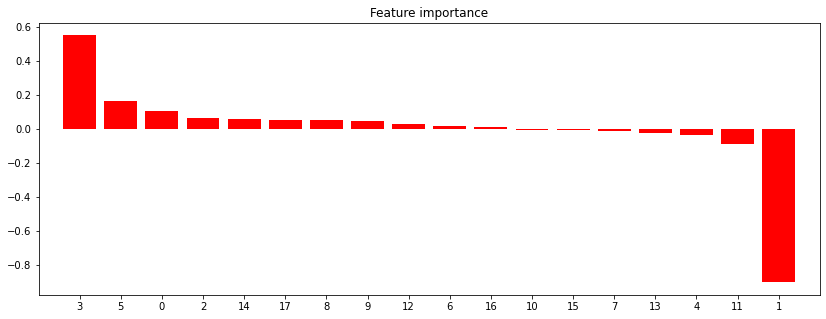

In [23]:
# Feature importance for Best Estimator

importance = best_lr.coef_[0]
indices = np.argsort(importance)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(features)):
    print("%d. %s (%f)" % (f + 1, features[f], importance[indices[f]]))

plt.figure(figsize=(14,5))
plt.title("Feature importance")
plt.bar(range(len(features)), importance[indices], color="r", align="center")
plt.xticks(range(len(features)), indices)
plt.xlim([-1, len(features)])
plt.show()

### Random Forest

In [24]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [25]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)

In [26]:
print(classification_report(Y_test, rfc_pred_test, target_names=['Good (0)', 'Bad (1)']))

              precision    recall  f1-score   support

    Good (0)       0.94      1.00      0.97      6587
     Bad (1)       0.50      0.00      0.00       432

    accuracy                           0.94      7019
   macro avg       0.72      0.50      0.49      7019
weighted avg       0.91      0.94      0.91      7019



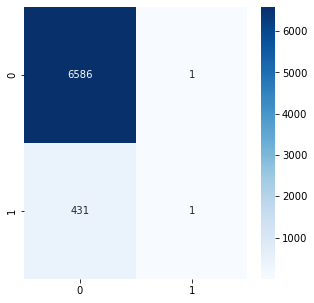

In [27]:
cm = confusion_matrix(Y_test, rfc_pred_test)

cm_matrix = pd.DataFrame(data=cm)


fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues');

### Decision Trees

In [28]:
# Criterion to Gini
clf = DecisionTreeClassifier(criterion="gini")

# Fitting
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [29]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion="gini",
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter="best")

DecisionTreeClassifier()

In [30]:
# Prediction
y_pred = clf.predict(X_test)

In [31]:
# Change Criterion to Entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy")

# Fitting
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
# Predicting Labels on Test Set
y_pred_entropy = clf_entropy.predict(X_test)

In [33]:
print("-------------------------------------------------------------------------------")
print("Accuracy Score on Train Data(entropy): ", accuracy_score(y_true=Y_train, y_pred=clf_entropy.predict(X_train)))
print("Accuracy Score on Test Data(entropy): ", accuracy_score(y_true=Y_test, y_pred=y_pred_entropy))
print("-------------------------------------------------------------------------------")

-------------------------------------------------------------------------------
Accuracy Score on Train Data(entropy):  0.9998778625954199
Accuracy Score on Test Data(entropy):  0.8759082490383245
-------------------------------------------------------------------------------


In [34]:
# Tuning Parameters
clf2 = DecisionTreeClassifier(criterion="entropy", min_samples_split=50)

#Fitting
clf2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

In [35]:
print("-------------------------------------------------------------------------------")
print("Accuracy Score on Train Data(entropy): ", accuracy_score(y_true=Y_train, y_pred=clf2.predict(X_train)))
print("Accuracy Score on Test Data(entropy): ", accuracy_score(y_true=Y_test, y_pred=clf2.predict(X_test)))
print("-------------------------------------------------------------------------------")

-------------------------------------------------------------------------------
Accuracy Score on Train Data(entropy):  0.942351145038168
Accuracy Score on Test Data(entropy):  0.9357458327397065
-------------------------------------------------------------------------------


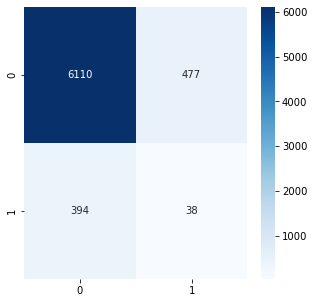

In [36]:
cm = confusion_matrix(Y_test, y_pred_entropy)

cm_matrix = pd.DataFrame(data=cm)


fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues');